In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import operator
import collections
import seaborn as sb
from sklearn.cluster import KMeans

In [2]:
data = pd.read_json('data.json')

In [3]:
data

,id,col,row,location,places,categories,bounds
0,1,1,1,"{'lat': -23.599319537004636, 'lng': -46.658861...",[[{'geometry': {'location': {'lat': -23.550519...,"[health, food, miscellaneous, finance, service...","{'north': -23.597073748794333, 'south': -23.60..."
1,2,2,1,"{'lat': -23.599319460099398, 'lng': -46.653959...",[[{'geometry': {'location': {'lat': -23.550519...,"[entertainment, miscellaneous, administrative,...","{'north': -23.597073671889103, 'south': -23.60..."
2,3,3,1,"{'lat': -23.59931938319417, 'lng': -46.6490583...",[[{'geometry': {'location': {'lat': -23.550519...,"[miscellaneous, miscellaneous, miscellaneous, ...","{'north': -23.597073594983875, 'south': -23.60..."


In [5]:
places = data[['places']]

In [6]:
# Reading the json as a dict
with open('macrocategories.json') as json_data:
    macrocategories = json.load(json_data)

In [7]:
i = 0
place = dict()
#loop thought cells
for row in places.iterrows():
    #loop thought request google (max 3x20)
    for request_page in row[1]:
        #Loop thought places in request
        for place_in_request in request_page:
            #Loop thought items of places
            for item in place_in_request:
                i = i + 1            
                place[i] = {}
                place[i]['name'] = item["name"]
                place[i]['lat']  = item["geometry"]["location"]["lat"]
                place[i]['lng']  = item["geometry"]["location"]["lng"]
                if len(item["types"]) > 0:
                    place[i]['cat1'] = item["types"][0]
                else:
                    place[i]['cat1'] = "NaN"
                    
                if len(item["types"]) > 1:
                    place[i]['cat2'] = item["types"][1]
                else:
                    place[i]['cat2'] = "NaN"
                
                if len(item["types"]) > 2:
                    place[i]['cat3'] = item["types"][2]
                else:
                    place[i]['cat3'] = "NaN"
                    
                if len(item["types"]) > 3:
                    place[i]['cat4'] = item["types"][3]
                else:
                    place[i]['cat4'] = "NaN"
                
                if len(item["types"]) > 4:
                    place[i]['cat5'] = item["types"][4]
                else:
                    place[i]['cat5'] = "NaN"
                        
                array_macro_cat = []
                for item in macrocategories.items():
                    if(place[i]["cat1"] in item[1]):
                        macro_cat = item[0]
                        if (item[0] != "miscellaneous"):
                            array_macro_cat.append(item[0])    
                    if(place[i]["cat2"] in item[1]):
                        if (item[0] != "miscellaneous"):
                            macro_cat = item[0]
                            array_macro_cat.append(item[0])
                    if(place[i]["cat3"] in item[1]):                        
                        if (item[0] != "miscellaneous"):
                            macro_cat = item[0]
                            array_macro_cat.append(item[0])
                    if(place[i]["cat4"] in item[1]):                        
                        if (item[0] != "miscellaneous"):
                            macro_cat = item[0]
                            array_macro_cat.append(item[0])
                    if(place[i]["cat5"] in item[1]):                        
                        if (item[0] != "miscellaneous"):
                            macro_cat = item[0]
                            array_macro_cat.append(item[0])                 
                place[i]['array_macro_cat'] = array_macro_cat
                place[i]['macro_cat'] = macro_cat
                

In [61]:
table1 = pd.DataFrame(place)

In [62]:
table1 = table1.transpose()

In [63]:
table1.head(100)

,name,lat,lng,cat1,cat2,cat3,cat4,cat5,array_macro_cat,macro_cat
1,São Paulo,-23.5505,-46.6333,locality,political,NaN,NaN,NaN,[],miscellaneous
2,Clube Atlético Monte Líbano,-23.5986,-46.6587,gym,health,point_of_interest,establishment,NaN,"[health, health]",health
3,Chicohamburger,-23.6008,-46.6592,meal_takeaway,restaurant,food,point_of_interest,establishment,"[food, food, food]",food
4,Cetao Centro de Estudos Trein e Aperf em Odont...,-23.6005,-46.6577,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous
5,Bradesco,-23.5987,-46.6593,bank,atm,finance,point_of_interest,establishment,"[finance, finance, finance]",finance
...,...,...,...,...,...,...,...,...,...,...
96,Bike Itaú,-23.598,-46.6535,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous
97,Imperador Construtora E Incorporadora,-23.6006,-46.6534,general_contractor,point_of_interest,establishment,NaN,NaN,[services],services
98,BikeSP Estação 313 - Metrô AACD Servidor,-23.598,-46.6534,parking,point_of_interest,establishment,NaN,NaN,[services],services
99,Compliance Review,-23.6001,-46.6525,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous


In [76]:
table2 = table1[table1['lat'] < -23.58]

In [86]:
table3 = table2[table2['lng'] > -46.665] 

In [87]:
table3

,name,lat,lng,cat1,cat2,cat3,cat4,cat5,array_macro_cat,macro_cat
2,Clube Atlético Monte Líbano,-23.5986,-46.6587,gym,health,point_of_interest,establishment,NaN,"[health, health]",health
3,Chicohamburger,-23.6008,-46.6592,meal_takeaway,restaurant,food,point_of_interest,establishment,"[food, food, food]",food
4,Cetao Centro de Estudos Trein e Aperf em Odont...,-23.6005,-46.6577,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous
5,Bradesco,-23.5987,-46.6593,bank,atm,finance,point_of_interest,establishment,"[finance, finance, finance]",finance
6,Ademir Novo Corretora de Seguros,-23.5987,-46.6598,insurance_agency,point_of_interest,establishment,NaN,NaN,[services],services
...,...,...,...,...,...,...,...,...,...,...
176,Quitanda da Cerveja,-23.5977,-46.6501,bar,point_of_interest,establishment,NaN,NaN,[food],food
177,Loko Coco Brasil,-23.6012,-46.6485,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous
178,fd comunicação,-23.5974,-46.6483,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous
179,1488,-23.6013,-46.6486,doctor,dentist,health,point_of_interest,establishment,"[health, health, health]",health


In [50]:
X = np.array(source.drop(['name','cat1','cat2','cat3','cat4','cat5','array_macro_cat','macro_cat'],axis = 1))

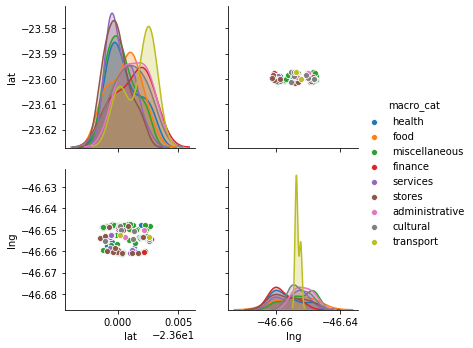

In [88]:
sb.pairplot(table3, hue='macro_cat')

In [51]:
kmeans = KMeans(n_clusters = 6, random_state=0)

In [52]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [53]:
kmeans.labels_

array([1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 5, 5, 5, 5,
       2, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 2, 4, 2, 2, 5, 2, 2, 2, 2, 5,
       5, 2, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2,
       2, 5, 5, 2, 2, 5, 2, 5, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [54]:
source['kclasse5'] = kmeans.labels_

In [55]:
source

,name,lat,lng,cat1,cat2,cat3,cat4,cat5,array_macro_cat,macro_cat,kclasse5
1,São Paulo,-23.5505,-46.6333,locality,political,NaN,NaN,NaN,[],miscellaneous,1
2,Clube Atlético Monte Líbano,-23.5986,-46.6587,gym,health,point_of_interest,establishment,NaN,"[health, health]",health,3
3,Chicohamburger,-23.6008,-46.6592,meal_takeaway,restaurant,food,point_of_interest,establishment,"[food, food, food]",food,3
4,Cetao Centro de Estudos Trein e Aperf em Odont...,-23.6005,-46.6577,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous,3
5,Bradesco,-23.5987,-46.6593,bank,atm,finance,point_of_interest,establishment,"[finance, finance, finance]",finance,3
...,...,...,...,...,...,...,...,...,...,...,...
176,Quitanda da Cerveja,-23.5977,-46.6501,bar,point_of_interest,establishment,NaN,NaN,[food],food,0
177,Loko Coco Brasil,-23.6012,-46.6485,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous,0
178,fd comunicação,-23.5974,-46.6483,point_of_interest,establishment,NaN,NaN,NaN,[],miscellaneous,0
179,1488,-23.6013,-46.6486,doctor,dentist,health,point_of_interest,establishment,"[health, health, health]",health,0
